# Color Quantization using K-Means Algorithm

In [79]:
#IMPORTS
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import six
from io import StringIO

## What is Color Quantization
In computer graphics, color quantization or color image quantization is a process that reduces the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image.


![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)
An example image in 24-bit RGB color
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)
The same image reduced to a palette of 16-bit colors

# Why Color Quantization


In [176]:
#Image name you want to do color quantization
image_name="img9.jpg"
display.HTML('<img src="{}" height=20px style="height: 400px;">'.format(image_name)) #To display the image

In [177]:
#To load the image as an numpy array

import imageio
image = imageio.imread('img9.jpg')
print(image)
print(image.shape)


[[[142 138 127]
  [142 138 127]
  [142 138 127]
  ...
  [222 218 207]
  [222 218 207]
  [222 218 207]]

 [[142 138 127]
  [142 138 127]
  [142 138 127]
  ...
  [222 218 207]
  [222 218 207]
  [221 217 206]]

 [[142 138 127]
  [142 138 127]
  [142 138 127]
  ...
  [221 217 206]
  [221 217 206]
  [221 217 206]]

 ...

 [[167 167 159]
  [168 168 160]
  [171 171 163]
  ...
  [119 115 104]
  [119 115 104]
  [119 115 104]]

 [[165 165 157]
  [167 167 159]
  [170 170 162]
  ...
  [119 115 104]
  [118 114 103]
  [118 114 103]]

 [[165 165 157]
  [167 167 159]
  [171 171 163]
  ...
  [118 114 103]
  [118 114 103]
  [118 114 103]]]
(768, 1024, 3)


<ipython-input-177-260a0b6be690>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('img9.jpg')


In [178]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Widht:",w)
print("Height:",h)
print("Channels/Dimension:",d)
print("Each channel for RGB and Range is [0 -255]")
print("If each channel required 1 byte of space which means 3 bytes for each pixel")
print("\nThen for whole image it will require {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("Which comes around {} Mb".format((w*h*d)/(10000000)))

Widht: 768
Height: 1024
Channels/Dimension: 3
Each channel for RGB and Range is [0 -255]
If each channel required 1 byte of space which means 3 bytes for each pixel

Then for whole image it will require 768 x 1024 x 3 = 2359296 bytes
Which comes around 0.2359296 Mb


* Its is a huge amount of size
* In applications like Embedded system and low storage systems not ideal to have image this big 
* For some applications we don't require the image to be of 16 milllion colours (255x255x255) so we can represent the image using limited colours by not afftecting the quality much
<hr>
* How to do it?
* One of the techniques is K-means Clustering

# K-means Clustering

In [179]:
n_colors = 2000 #Value of k 

In [180]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
# plt.imshow behaves works well on float data (need to be in the range [0-1])
image = np.array(image, dtype=np.float64) / 255
# # Load Image and transform to a 2D numpy array.
# w, h, d = original_shape = tuple(image.shape)
# print(w,h,d)

assert d == 3 #The code forward runs for 3 channel only

Earlier we had each pixel as list inside row and each row was stored as list in bigger list.
Converting such that we have just each list of pixel inside a list

In [181]:
image_array = np.reshape(image, (w * h, d))
print(image_array)
print(image_array.shape)

[[0.55686275 0.54117647 0.49803922]
 [0.55686275 0.54117647 0.49803922]
 [0.55686275 0.54117647 0.49803922]
 ...
 [0.4627451  0.44705882 0.40392157]
 [0.4627451  0.44705882 0.40392157]
 [0.4627451  0.44705882 0.40392157]]
(786432, 3)


In [182]:
%%javascript
//To make the output area non-scrollable
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Training using k-means for creating 64 cluster

In [183]:
print("Fitting model on a small sub-sample of the data")

t0 = time() #has time in seconds since epoch(1970)

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

#total seconds taken for fitting
print("done in %0.3fs." % (time() - t0)) 
# print("Sample Array size:",image_array_sample.shape)

print("\nK means Labels:\n",kmeans.labels_)
print("\nCluster Centers/ Centroids:\n",kmeans.cluster_centers_[:5])


Fitting model on a small sub-sample of the data
done in 44.943s.

K means Labels:
 [ 505 1844  143 ...  263 1246    0]

Cluster Centers/ Centroids:
 [[0.49411765 0.45882353 0.42352941]
 [0.63921569 0.63529412 0.61960784]
 [0.49411765 0.45882353 0.42352941]
 [0.5254902  0.49411765 0.41176471]
 [0.71764706 0.49019608 0.        ]]


<ipython-input-183-57c3fe55939d>:11: ConvergenceWarning: Number of distinct clusters (1429) found smaller than n_clusters (2000). Possibly due to duplicate points in X.
  knnsample = kmeans.fit(image_array_sample)


## Predicting Labels for all the pixels using the our clusters 

In [184]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
done in 4.717s.
Predicted Labels: [341 341 341 ... 322 322 322]


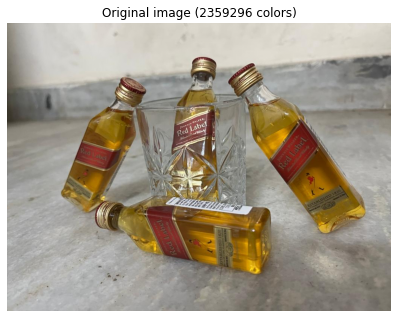

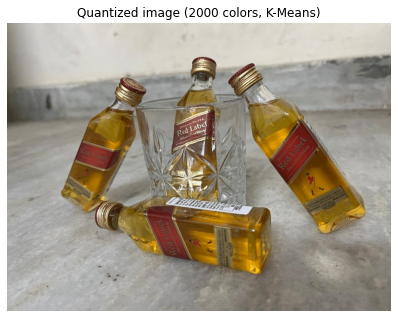

In [185]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
temp="Quantized image ("+(str)(n_colors)+ " colors, K-Means)"
plt.title(temp)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))